In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-mental-health/Student Mental health.csv


In [3]:
df = pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv')

In [4]:
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


# What do I want to analyze?
* Does woman shows more depression? anxiety? panic attack?
* Is there specific year which shows high deression rate? or any mental problem?
* Does the low CGPA has something to do with high deression rate? or any mental problem?
* Does the 'marital status' has something to do with high deression rate? or any mental problem?
* Machine learning algorithm?

# The Key Findings

* Among respondents, only **6%** responded that they received the **treatment**.
* When compared by gender, **woman** shows more **depression** and slightly higher panic attack, while **man** shows more **anxiety**.
* Students with **year 2 or 3** shows higher mental problem compared to year 1 or 4.
* There is **NO** significant relationship between **CGPA** and **any mental problem**. Also, since the most of students are above CGPA 3.0, the backdata is not ennough as well to find meaningful difference.
* **Marital staus** seems to affect **mental problem** at least even though only **16%** respondents are **married**. The **married respondents** shows **higher depression, anxiety and panic attack** compared to single respondents. Also, all of them suffer from depression currently.

# Data Wrangling

## Things to do
* Rename column names
* Yes, no convert to 1, 0 in 'marital status' to 'treatment' columns
* Unify the value in current year of study (i.g. Year 1 -> year 1)
* Add another columns called 'Any mental problem' (indicated as 1 if any 1 in depression, anxiety or panic attack)
* Unify the value of '3.50 - 4.00' 

#### 1) Rename column names

In [5]:
df.columns.tolist() # tolist() (list 형식으로)

['Timestamp',
 'Choose your gender',
 'Age',
 'What is your course?',
 'Your current year of Study',
 'What is your CGPA?',
 'Marital status',
 'Do you have Depression?',
 'Do you have Anxiety?',
 'Do you have Panic attack?',
 'Did you seek any specialist for a treatment?']

In [6]:
new_columns=['Timestamp', 'Gender', 'Age', 'Course','Current year of Study', 'CGPA', 'Marital status','Depression', 'Anxiety','Panic attack','treatment']

df.columns = new_columns
df.head(5)

,Timestamp,Gender,Age,Course,Current year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


#### 2) Yes, No convert to 1, 0 in 'marital status' to 'treatment' columns

In [7]:
# Convert yes, no to 1 or 0 in 'marital status' to 'treatment' columns


df[df.columns[-5:]] = df[df.columns[-5:]].replace('Yes', 1)
df[df.columns[-5:]] = df[df.columns[-5:]].replace('No', 0)

df.head(10)

,Timestamp,Gender,Age,Course,Current year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,0,0,0,1,0
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,1,1,0,1,0
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,0,0,1,0,0
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,0,0,0,0,0
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,0,0,1,1,0


#### 3) Unify the value in current year of study (i.g. Year 1 -> year 1)

In [8]:
df['Current year of Study'].replace('Year 1', 'year 1', inplace=True)
df['Current year of Study'].replace('Year 2', 'year 2', inplace=True)
df['Current year of Study'].replace('Year 3', 'year 3', inplace=True)
df['Current year of Study'].replace('Year 4', 'year 4', inplace=True)

#### 4) Add another columns called 'Any mental problem' (indicated as 1 if any 1 in depression, anxiety or panic attack)

In [9]:
# depression, anxiety or panic attack 에서 더해서 1 이상이면 1 로 하는 칼럼 생성, 나중에 블로그에 정리...

df['Any_mental_prob'] = (df['Depression'] + df['Anxiety'] + df['Panic attack']).apply(lambda x: 1 if x >= 1 else 0)
df['Any_mental_prob'] 

0      1
1      1
2      1
3      1
4      0
      ..
96     1
97     1
98     1
99     0
100    0
Name: Any_mental_prob, Length: 101, dtype: int64

#### 5) Unify the value of '3.50 - 4.00' 

In [10]:
# 하나는 띄어쓰기가 포함되어 있었음....

df['CGPA'].replace('3.50 - 4.00 ','3.50 - 4.00', inplace=True)
df['CGPA'].value_counts()

3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: CGPA, dtype: int64

#### 6) Since 1 null value in Age, drop the row

In [11]:
df.dropna(subset=['Age'], axis=0, inplace=True)

# Data Exploration (EDA)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              100 non-null    object 
 1   Gender                 100 non-null    object 
 2   Age                    100 non-null    float64
 3   Course                 100 non-null    object 
 4   Current year of Study  100 non-null    object 
 5   CGPA                   100 non-null    object 
 6   Marital status         100 non-null    int64  
 7   Depression             100 non-null    int64  
 8   Anxiety                100 non-null    int64  
 9   Panic attack           100 non-null    int64  
 10  treatment              100 non-null    int64  
 11  Any_mental_prob        100 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 10.2+ KB


In [13]:
df.describe()

,Age,Marital status,Depression,Anxiety,Panic attack,treatment,Any_mental_prob
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.53000,0.160000,0.350000,0.340000,0.330000,0.060000,0.640000
std,2.49628,0.368453,0.479372,0.476095,0.472582,0.238683,0.482418
min,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,23.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,24.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# How many 'Age' in dataset?

df['Age'].value_counts()

18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: Age, dtype: int64

In [15]:
# How many 'course' in dataset?

df['Course'].value_counts()

BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

In [16]:
# How many 'year of study' in dataset?

df['Current year of Study'].value_counts()

year 1    42
year 2    26
year 3    24
year 4     8
Name: Current year of Study, dtype: int64

In [17]:
# How many 'CGPA' in dataset?

df['CGPA'].value_counts()

3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        3
2.00 - 2.49     2
Name: CGPA, dtype: int64

In [18]:
# Marital status distribution

df['Marital status'].value_counts()


0    84
1    16
Name: Marital status, dtype: int64

In [19]:
df[df['Marital status'] == 1]

,Timestamp,Gender,Age,Course,Current year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,treatment,Any_mental_prob
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0,1
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,1,1,0,1,0,1
11,8/7/2020 12:39,Female,24.0,Engineering,year 3,3.50 - 4.00,1,1,0,0,0,1
17,8/7/2020 12:52,Female,24.0,ENM,year 4,3.00 - 3.49,1,1,1,1,0,1
19,8/7/2020 13:07,Female,18.0,Marine science,year 2,3.50 - 4.00,1,1,1,1,0,1
27,8/7/2020 13:41,Male,18.0,Engineering,year 2,3.00 - 3.49,1,1,1,0,0,1
28,8/7/2020 13:58,Female,24.0,BIT,year 3,3.50 - 4.00,1,1,1,1,1,1
33,8/7/2020 14:31,Male,18.0,BCS,year 2,3.50 - 4.00,1,1,1,0,1,1
39,8/7/2020 14:56,Female,24.0,Engineering,year 2,2.50 - 2.99,1,1,0,1,1,1
50,8/7/2020 15:27,Female,23.0,ALA,year 1,2.50 - 2.99,1,1,0,1,1,1


In [20]:
# Does woman shows more depression? anxiety? panic attack?

mental_prob_by_gender = pd.pivot_table(df, index='Gender', values=['Depression', 'Anxiety', 'Panic attack'], aggfunc='mean')
print(mental_prob_by_gender)

        Anxiety  Depression  Panic attack
Gender                                   
Female     0.32    0.386667      0.333333
Male       0.40    0.240000      0.320000


In [21]:
# Is there specific year which shows high deression rate or any mental problem??

mental_prob_by_year = df.groupby('Current year of Study')['Depression', 'Anxiety', 'Panic attack', 'Any_mental_prob'].mean()
print(mental_prob_by_year)

                       Depression   Anxiety  Panic attack  Any_mental_prob
Current year of Study                                                     
year 1                   0.333333  0.333333      0.333333         0.595238
year 2                   0.384615  0.384615      0.307692         0.730769
year 3                   0.416667  0.333333      0.416667         0.750000
year 4                   0.125000  0.250000      0.125000         0.250000


/tmp/ipykernel_32/1539231818.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mental_prob_by_year = df.groupby('Current year of Study')['Depression', 'Anxiety', 'Panic attack', 'Any_mental_prob'].mean()


In [22]:
# Does the low CGPA has something to do with high deression rate? or any mental problem?

mental_prob_by_cgpa = df.groupby('CGPA')['Depression', 'Anxiety', 'Panic attack', 'Any_mental_prob'].mean()
print(mental_prob_by_cgpa)

             Depression   Anxiety  Panic attack  Any_mental_prob
CGPA                                                            
0 - 1.99       0.000000  0.000000      0.333333         0.333333
2.00 - 2.49    0.000000  0.000000      0.500000         0.500000
2.50 - 2.99    0.750000  0.250000      0.750000         0.750000
3.00 - 3.49    0.441860  0.348837      0.209302         0.651163
3.50 - 4.00    0.270833  0.375000      0.395833         0.645833


/tmp/ipykernel_32/852043908.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mental_prob_by_cgpa = df.groupby('CGPA')['Depression', 'Anxiety', 'Panic attack', 'Any_mental_prob'].mean()


In [23]:
# Does the 'marital status' has something to do with high deression rate? or any mental problem?

mental_prob_by_marriage = df.groupby('Marital status')['Depression', 'Anxiety', 'Panic attack', 'Any_mental_prob'].mean()
print(mental_prob_by_marriage)

                Depression   Anxiety  Panic attack  Any_mental_prob
Marital status                                                     
0                  0.22619  0.321429       0.27381         0.571429
1                  1.00000  0.437500       0.62500         1.000000


/tmp/ipykernel_32/4285780594.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mental_prob_by_marriage = df.groupby('Marital status')['Depression', 'Anxiety', 'Panic attack', 'Any_mental_prob'].mean()


# Data Visualization

Some key findings have been visualized below.

In [24]:
# matplotlib color type

import matplotlib

colors={}

for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex

print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

### 1. The mental problem type comparision by gender
* When compared by gender, **woman** shows more **depression** and slightly higher panic attack, while **man** shows more **anxiety**. The overall mental problem rate looks similar (around 64% for both woman and man out of all respondents)

In [25]:
gender_mentalprob = df.groupby('Gender')['Depression', 'Anxiety', 'Panic attack', 'Any_mental_prob'].mean()
gender_mentalprob = gender_mentalprob.transpose()
gender_mentalprob

/tmp/ipykernel_32/2379187532.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender_mentalprob = df.groupby('Gender')['Depression', 'Anxiety', 'Panic attack', 'Any_mental_prob'].mean()


Gender,Female,Male
Depression,0.386667,0.24
Anxiety,0.320000,0.40
Panic attack,0.333333,0.32
Any_mental_prob,0.640000,0.64


<Figure size 2000x1000 with 0 Axes>

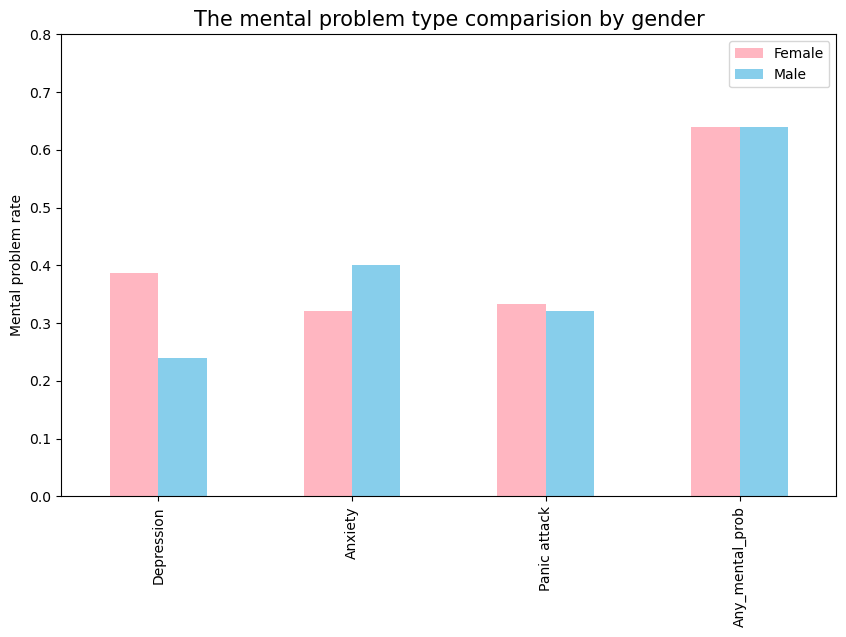

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

gender_mentalprob.plot(kind='bar', color=['lightpink', 'skyblue'], figsize=(10, 6))

plt.title('The mental problem type comparision by gender', size=15)
plt.legend(loc='upper right')
plt.ylim(0, 0.8)
plt.ylabel('Mental problem rate')
plt.show()

### 2. The mental problem comparision by year

* Students with **year 2 or 3** shows higher mental problem compared to year 1 or 4.

In [27]:
year_mentalprob = df.groupby('Current year of Study')['Any_mental_prob'].mean()
year_mentalprob

Current year of Study
year 1    0.595238
year 2    0.730769
year 3    0.750000
year 4    0.250000
Name: Any_mental_prob, dtype: float64

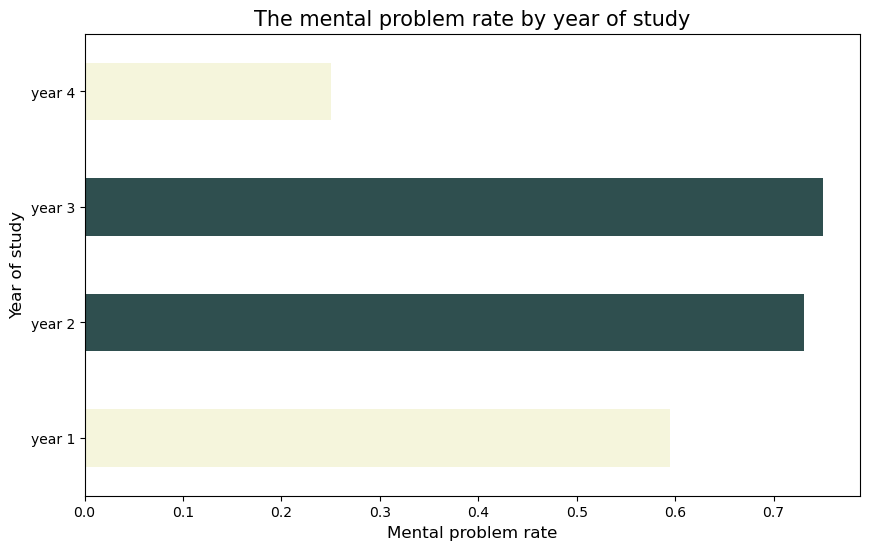

In [28]:
import matplotlib.pyplot as plt

year_mentalprob.plot(kind='barh', color=['beige', 'darkslategray', 'darkslategray', 'beige'], figsize=(10, 6)) # applying color individually

plt.title('The mental problem rate by year of study', size=15)
plt.ylabel('Year of study', size=12)
plt.xlabel('Mental problem rate', size=12)

plt.show()

### 3. The mental problem comparision by marital status

* **Marital staus** seems to affect **mental problem** at least even though only **16%** respondents responded that they are **married**. 
* The **married respondents** shows **higher depression, anxiety and panic attack** compared to single respondents. 
* It seems that **depression** looks obvious especially since **all of the married respondents** responded that they suffer from **depression** currently.

In [29]:
married_mentalprob = df.groupby('Marital status')[['Depression', 'Anxiety', 'Panic attack', 'Any_mental_prob']].mean()
married_mentalprob

,Depression,Anxiety,Panic attack,Any_mental_prob
Marital status,,,,
0,0.22619,0.321429,0.27381,0.571429
1,1.00000,0.437500,0.62500,1.000000


In [30]:
# 0, 1 convert to 'single' and 'married' in married_mentalprob index for visualization

married_mentalprob.index = ['Single', 'Married']
married_mentalprob

,Depression,Anxiety,Panic attack,Any_mental_prob
Single,0.22619,0.321429,0.27381,0.571429
Married,1.00000,0.437500,0.62500,1.000000


In [31]:
# transposed for bar chart

married_mentalprob = married_mentalprob.transpose()
married_mentalprob

,Single,Married
Depression,0.226190,1.0000
Anxiety,0.321429,0.4375
Panic attack,0.273810,0.6250
Any_mental_prob,0.571429,1.0000


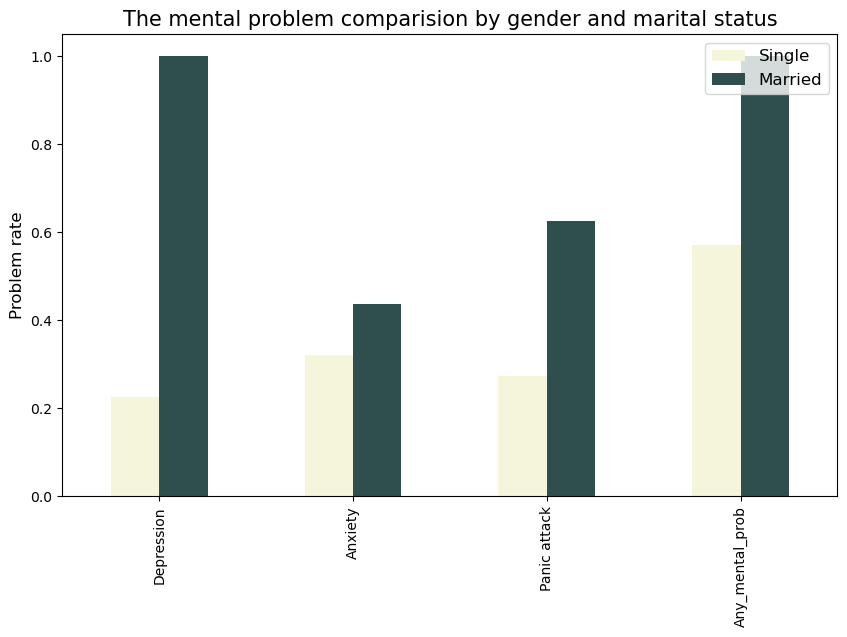

In [32]:
import matplotlib.pyplot as plt

married_mentalprob.plot(kind='bar', color=['beige','darkslategray'], figsize=(10, 6))

plt.title('The mental problem comparision by gender and marital status', size=15)
plt.ylabel('Problem rate', size=12)
plt.legend(loc='upper right', fontsize=12)
plt.show()

# Forecast the possibilities of depression with logistics regression

In [33]:
df.head(3)

,Timestamp,Gender,Age,Course,Current year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,treatment,Any_mental_prob
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0,1
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0,1
2,8/7/2020 12:05,Male,19.0,BIT,year 1,3.00 - 3.49,0,1,1,1,0,1


In [34]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Current year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'treatment',
       'Any_mental_prob'],
      dtype='object')

### 1. Preprocessing

### 1-1) Select  the only the necessary colums

In [35]:
# select only the necessary colums

new_df = df[['Gender', 'Age', 'Current year of Study', 'CGPA', 'Marital status', 'Depression']]

new_df.head(3)

,Gender,Age,Current year of Study,CGPA,Marital status,Depression
0,Female,18.0,year 1,3.00 - 3.49,0,1
1,Male,21.0,year 2,3.00 - 3.49,0,0
2,Male,19.0,year 1,3.00 - 3.49,0,1


In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 100 non-null    object 
 1   Age                    100 non-null    float64
 2   Current year of Study  100 non-null    object 
 3   CGPA                   100 non-null    object 
 4   Marital status         100 non-null    int64  
 5   Depression             100 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 5.5+ KB


### 1-2) Categorize the independent variable and depedent variables

* Break down into x, y
* Make X variable into array type

In [37]:
# Categorize the columns

new_df_y = new_df['Depression']
new_df_x = new_df[['Age', 'Marital status', 'Gender', 'Current year of Study', 'CGPA']].values # array 열로 만들기 위해 .values 
# new_df_x_numeric = new_df[['Age', 'Marital status']]
# new_df_x_categorical = new_df[['Gender', 'Current year of Study', 'CGPA']]

In [38]:
new_df_x[0:5]

array([[18.0, 0, 'Female', 'year 1', '3.00 - 3.49'],
       [21.0, 0, 'Male', 'year 2', '3.00 - 3.49'],
       [19.0, 0, 'Male', 'year 1', '3.00 - 3.49'],
       [22.0, 1, 'Female', 'year 3', '3.00 - 3.49'],
       [23.0, 0, 'Male', 'year 4', '3.00 - 3.49']], dtype=object)

### 1-3) Convert categorical data into numerical values

* Convert categorical data using 'LabelEncoder() method'

In [39]:
from sklearn import preprocessing # Use preprocessing in sklearn

# convert 'Gender'
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Female', 'Male'])
new_df_x[:, 2] = le_gender.transform(new_df_x[:, 2])

# convert 'Current year of Study'
le_yearofstudy = preprocessing.LabelEncoder()
le_yearofstudy.fit(['year 1', 'year 2', 'year 3', 'year 4'])
new_df_x[:, 3] = le_yearofstudy.transform(new_df_x[:, 3])

# convert 'CGPA'
le_cgpa = preprocessing.LabelEncoder()
le_cgpa.fit(['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00'])
new_df_x[:, 4] = le_cgpa.transform(new_df_x[:, 4])


In [40]:
new_df_x[0:5]

array([[18.0, 0, 0, 0, 3],
       [21.0, 0, 1, 1, 3],
       [19.0, 0, 1, 0, 3],
       [22.0, 1, 0, 2, 3],
       [23.0, 0, 1, 3, 3]], dtype=object)

In [41]:
# y도 array 형식으로 

new_df_y = np.asarray(new_df['Depression'])
new_df_y[0:5] 

array([1, 0, 1, 1, 0])

### 1-4) Normalize the X

* Feature scaling process
* Normalize the x variables by using standardscaler() or minmaxscaler()

In [42]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(new_df_x).transform(new_df_x)
X[0:10]

array([[-1.01861394, -0.43643578, -0.57735027, -0.99015159, -0.35238651],
       [ 0.18922868, -0.43643578,  1.73205081,  0.02020718, -0.35238651],
       [-0.61599974, -0.43643578,  1.73205081, -0.99015159, -0.35238651],
       [ 0.59184288,  2.29128785, -0.57735027,  1.03056594, -0.35238651],
       [ 0.99445709, -0.43643578,  1.73205081,  2.0409247 , -0.35238651],
       [-0.61599974, -0.43643578,  1.73205081,  0.02020718,  0.78434416],
       [ 0.99445709,  2.29128785, -0.57735027,  0.02020718,  0.78434416],
       [-1.01861394, -0.43643578, -0.57735027, -0.99015159,  0.78434416],
       [-0.61599974, -0.43643578, -0.57735027,  0.02020718, -1.48911717],
       [-1.01861394, -0.43643578,  1.73205081, -0.99015159,  0.78434416]])

In [43]:
Y = new_df_y
Y[0:10]

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

### 2. Train, Test data setup

* Split into train and test data for modelling and verifying using **train_test_split** module.

In [44]:
# 훈련 데이터, 테스트 데이트 분할
 
from sklearn.model_selection import train_test_split
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 4)
 
print('Train set: ', X_train.shape, Y_train.shape)
print('Test set: ', Y_test.shape, Y_test.shape)

Train set:  (80, 5) (80,)
Test set:  (20,) (20,)


### 3. Modelling

* Select the appropriate model and train the model with train data
* Predict the y variable with the trained model

In [45]:
# Train the model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [46]:
# prediction

yhat = lr.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### 4. Verifying model's performance

* Verifying the performance of the model with **accuracy_score** module.

In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, yhat)
accuracy

0.65

In [48]:
print(Y_test)
print(yhat)

[0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
